In [5]:
cd "/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects/"

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/NET/timeSeriesViewer/dataRecordingObjects


In [6]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import pickle
# there were a lot of deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# stat the matlab engine & get data into python object
eng = matlab.engine.start_matlab() #the engine is set to the current path
bin_fullpath = r'/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Data/experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if fail - make sure you created eng in the rigיt path

In [34]:
time_start_hours = 7
time_start_ms = time_start_hours * 60.0 * 60 * 1000
startTime_ms = matlab.double([time_start_ms]) #crate a matlab array (numbers should be doubles)
channels = matlab.double(range(1,2))
time_window_hours = 1
time_window_ms = time_window_hours * 60.0 * 60 * 1000
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, time_window_ms)
py_mat = np.array(matlab_mat_data) #convert the result to python object
pc_pymat = py_mat[0][0]

In [35]:
# furier transform
# s_pymat = pc_pymat[:72000000]
s_pymat = pc_pymat
#f, t, Zxx = signal.stft(x, fs, nperseg=1000)
# x = the signal (vector of samples) ; fs = sample rate ; nperseg = window (num of samples)
frequencies, segment_times, freq_magnitudes = signal.stft(s_pymat, 20000, nperseg=200000, noverlap = 180000)

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


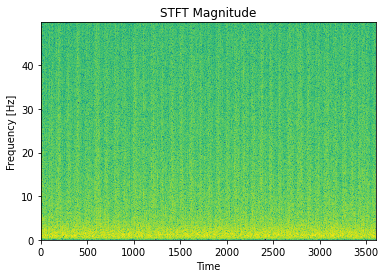

In [36]:
# segmentation and plot
plt.pcolormesh(segment_times[:], frequencies[:500], np.log(np.abs(freq_magnitudes[:500,:])))
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [37]:
from sklearn.cluster import KMeans

In [60]:
low_freqs = np.abs(freq_magnitudes[:500,]).transpose() #data matrix- until 50Hz
kmeans = KMeans(n_clusters=2, random_state=0).fit(low_freqs) 

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:444: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

In [61]:
lables = kmeans.labels_ 
cls1 = low_freqs[np.where(lables == 0)[0],:]
cls2 = low_freqs[np.where(lables == 1)[0],:]

In [62]:
def show_cls(cls):
    plt.figure(figsize=(cls.shape[0] / 100 ,5))
    plt.pcolormesh(segment_times[:cls.shape[0]], frequencies[:500], np.log(np.transpose(cls)))
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    # plt.xlabel('Time')
    plt.show()

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


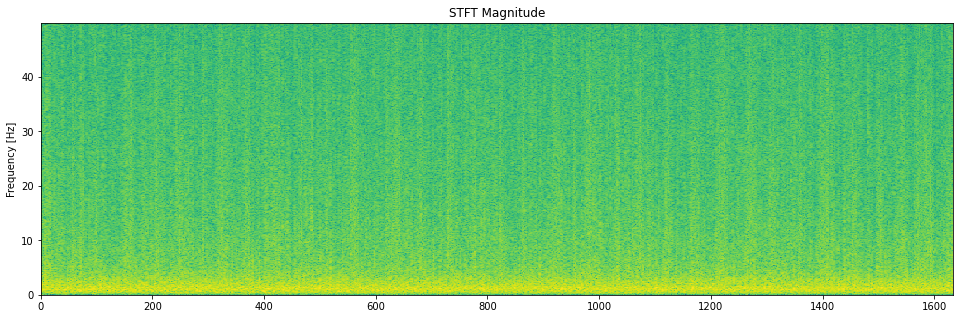

In [63]:
show_cls(cls1)

/home/yandex/BrainW2021/projects/ML_Ofir_Eden_Eden/Python_env/liz/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


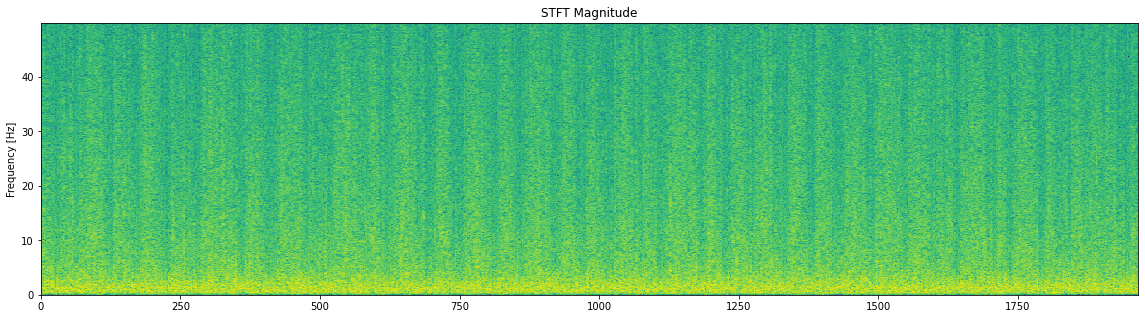

In [64]:
show_cls(cls2)

In [65]:
#cal the freqs
def avrg_freq_per_cluster(cls_group):
    cls_len = cls_group.shape[0]
    relevant_freqs = cls_group.shape[1]
    cls_freqs = [0]*relevant_freqs
    for vec in cls_group:
        for i in range(relevant_freqs):
            cls_freqs[i] += vec[i]

    cls_freqs =  np.divide(cls_freqs,cls_len)
    return cls_freqs

In [66]:
def show_graph(cls1_freqs, cls2_freqs):
    plt.plot(frequencies[:500],cls1_freqs)
    plt.plot(frequencies[:500],cls2_freqs)
    plt.show()

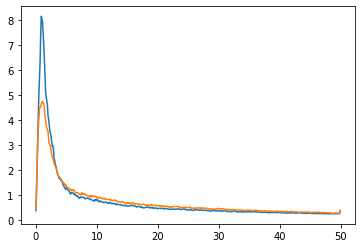

In [67]:
show_graph(avrg_freq_per_cluster(cls1), avrg_freq_per_cluster(cls2))